# Лабораторная работа №6: Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №19.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

## 1. Формирование дискретного сигнала

Дискретная последовательность возникает после выборки непрерывного сигнала с шагом дискретизации \(T = 1\). Исходный сигнал задаётся как сумма одиннадцати гармонических компонент:

$$
x(t) = \sum_{k=1}^{11} A_k \cos(\omega_k t + \phi_k)
$$

Частоты распределены в диапазоне от 0 до $pi$ с шагом $\Delta \omega = 0.1\pi$\. Амплитуды $A_k$ принимают случайные целые значения от 1 до 11 и при необходимости нормализуются делением на их сумму. Начальные фазы $\phi_k$ выбираются из интервала $[0,\,0.5]$.

После дискретизации получается последовательность из \(N=32\) отсчётов:

$$
x[n] = x(nT), \quad n = 0, 1, \dots, 31
$$

---

## 2. Дискретное преобразование Фурье

Для анализа частотного состава применяется ДПФ:

$$
X(n) = \sum_{k=0}^{N-1} x_k \, e^{-i\frac{2\pi n}{N}k}, \quad n = 0,\dots,N-1
$$

Полученные значения образуют дискретный спектр сигнала, используемый для сравнения исходных и отфильтрованных данных.

---

## 3. Линейные фильтры скользящего среднего

Сглаживание выполняется нерекурсивным фильтром вида:

$$
y_n = \sum_{k=0}^{M} c_k x_{n-k}
$$

Передаточная функция линейного сглаживания по \(2h+1\) точкам:

$$
\tilde{H}_{2h+1}(f) = 
\frac{1}{2h+1} \cdot 
\frac{\sin\left( 2\pi f\left(h+\frac12\right) \right)}{\sin(\pi f)}
$$

**Сглаживание по 5 точкам (\(h=2\)):**

$$
y_n = \frac{1}{5}(s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2})
$$

**Сглаживание по 9 точкам (\(h=4\)):**

$$
y_n = \frac{1}{9}(s_{n-4} + s_{n-3} + s_{n-2} + s_{n-1} + s_n + s_{n+1} + s_{n+2} + s_{n+3} + s_{n+4})
$$

---

## 4. Численное дифференцирование первого порядка

Симметричная разностная формула:

$$
s'_n = \frac{s_{n+1} - s_{n-1}}{2}
$$

Передаточная функция:

$$
H(\omega) = i \sin(\omega)
$$

---

## 5. Численное интегрирование: прямоугольники, трапеции, Симпсон

### Метод прямоугольников

$$
y_{n+1} = y_n + s_{n+\frac12}
$$

$$
H(\omega) = \frac{1}{2i\sin(\omega/2)}
$$

### Метод трапеций

$$
y_{n+1} = y_n + \frac{1}{2}(s_n + s_{n+1})
$$

$$
H(\omega) = \frac{\cos(\omega/2)}{2i\sin(\omega/2)}
$$

### Формула Симпсона

$$
y_{n+1} = y_{n-1} + \frac{1}{3}(s_{n-1} + 4s_n + s_{n+1})
$$

$$
H(\omega) = \frac{2 + \cos(\omega)}{3i\sin(\omega)}
$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Задание 1

Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos(\omega_k t+\phi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta\omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\phi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).


In [270]:
import numpy as np

np.random.seed(19)          # фиксируем seed для воспроизводимости

num_harmonics = 11               # количество гармоник
N = 31                     # число дискретных отсчетов
T = 1                      # шаг дискретизации

# Частоты от 0 до π равномерно
frequencies = np.linspace(0, np.pi, variant)

# Рандомные амплитуды и фазы
amplitudes = np.random.randint(1, variant + 1, size=variant).astype(float)  # преобразуем в float
phases = np.random.uniform(0, 0.5, size=variant)

# Нормализация амплитуд
amplitudes /= np.sum(amplitudes)

# Временные оси
t_discrete = np.arange(0, (N + 1) * T, T)               # дискретное время
t_continuous = np.linspace(0, N * T, N * 1000 + 1)      # плотная сетка для "аналогового" сигнала

# ---------------------------
# Формирование сигналов
# ---------------------------
# Аналоговый сигнал
signal_continuous = np.sum(
    amplitudes[:, None] * np.cos(frequencies[:, None] * t_continuous + phases[:, None]),
    axis=0
)

# Дискретный сигнал
signal_discrete = np.sum(
    amplitudes[:, None] * np.cos(frequencies[:, None] * t_discrete + phases[:, None]),
    axis=0
)


## Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

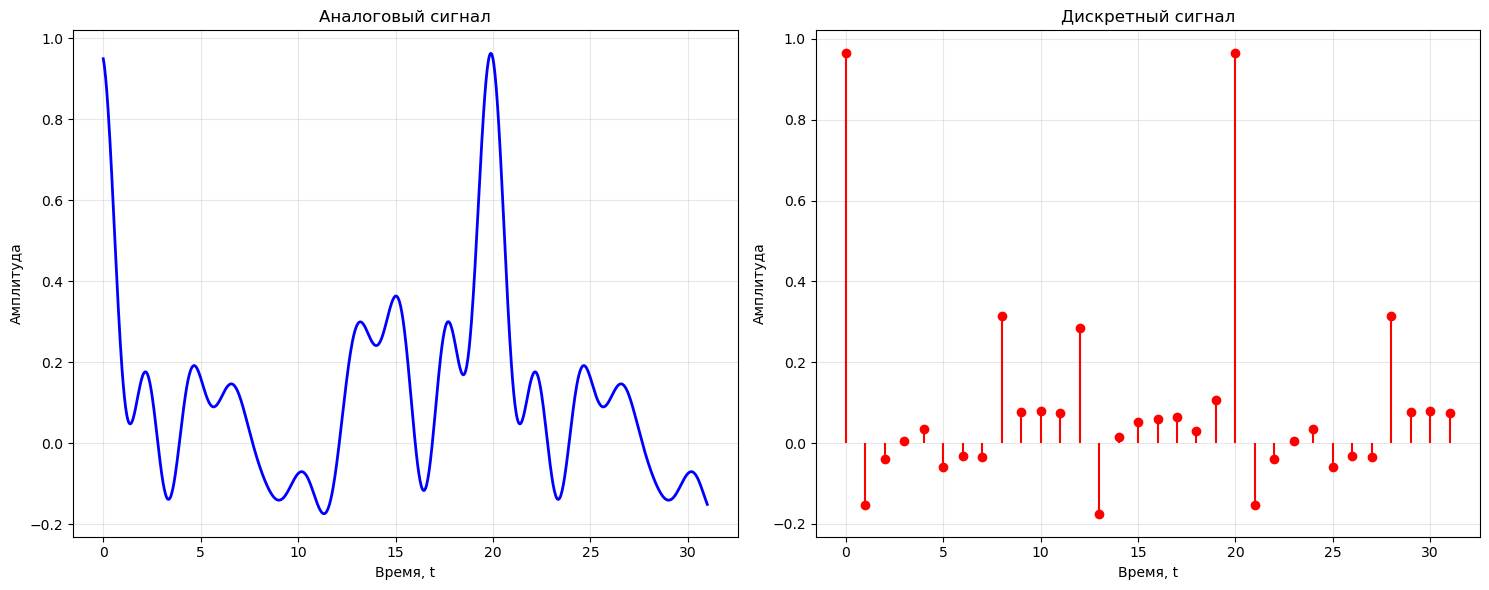

In [273]:
plt.figure(figsize=(15, 6))

# График 1: Аналоговый сигнал
plt.subplot(1, 2, 1)
t_analog = np.linspace(0, N * T, 1000)
signal_analog = np.zeros_like(t_analog)
for k in range(num_harmonics):
    signal_analog += A_k_normalized[k] * np.cos(frequencies[k] * t_analog + phi_k[k])

plt.plot(t_analog, signal_analog, 'b-', linewidth=2)
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Аналоговый сигнал')
plt.grid(True, alpha=0.3)

# График 2: Дискретный сигнал
plt.subplot(1, 2, 2)
plt.stem(t_discrete, signal_discrete, linefmt='r-', markerfmt='ro', basefmt=' ')
plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Дискретный сигнал')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.


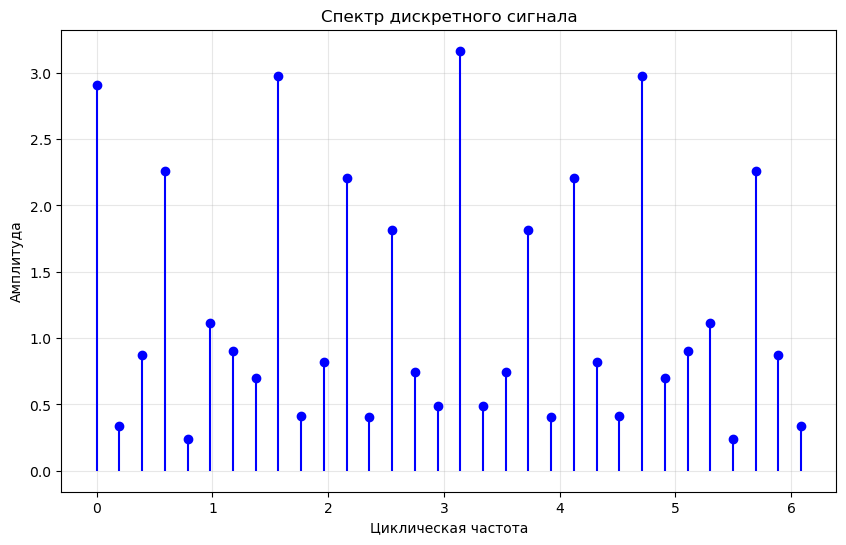

In [276]:
def dft(signal):
    N = len(signal)
    n = np.arange(N)
    spectr = np.zeros(N, dtype=complex)

    for k in range(N):
        spectr[k] = np.sum(signal * np.exp(-2j * np.pi * k * n / N))
    return spectr

spectr = dft(signal_discrete)

freq_axis = np.linspace(0, 2 * np.pi, len(signal_discrete), endpoint=False)
plt.figure(figsize=(10, 6))
plt.stem(freq_axis, np.abs(spectr), linefmt='b-', markerfmt='bo', basefmt=' ')
plt.xlabel('Циклическая частота')
plt.ylabel('Амплитуда')
plt.title('Спектр дискретного сигнала')
plt.grid(True, alpha=0.3)
plt.show()


## Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

In [279]:
#линейное сглаживание
def linear_smoothing(signal, window_size):
    if window_size % 2 == 0:
        return

    N = len(signal)
    smoothed = np.zeros_like(signal)
    half_window = window_size // 2

    smoothed[:half_window] = signal[:half_window]
    smoothed[N - half_window:] = signal[N - half_window:]

    for n in range(half_window, N - half_window):
        window = signal[n - half_window : n + half_window + 1]
        smoothed[n] = np.mean(window)

    return smoothed

# Сглаживание по 5 и 9 точкам
smoothed_5 = linear_smoothing(signal_discrete, 5)
smoothed_9 = linear_smoothing(signal_discrete, 9)


## Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

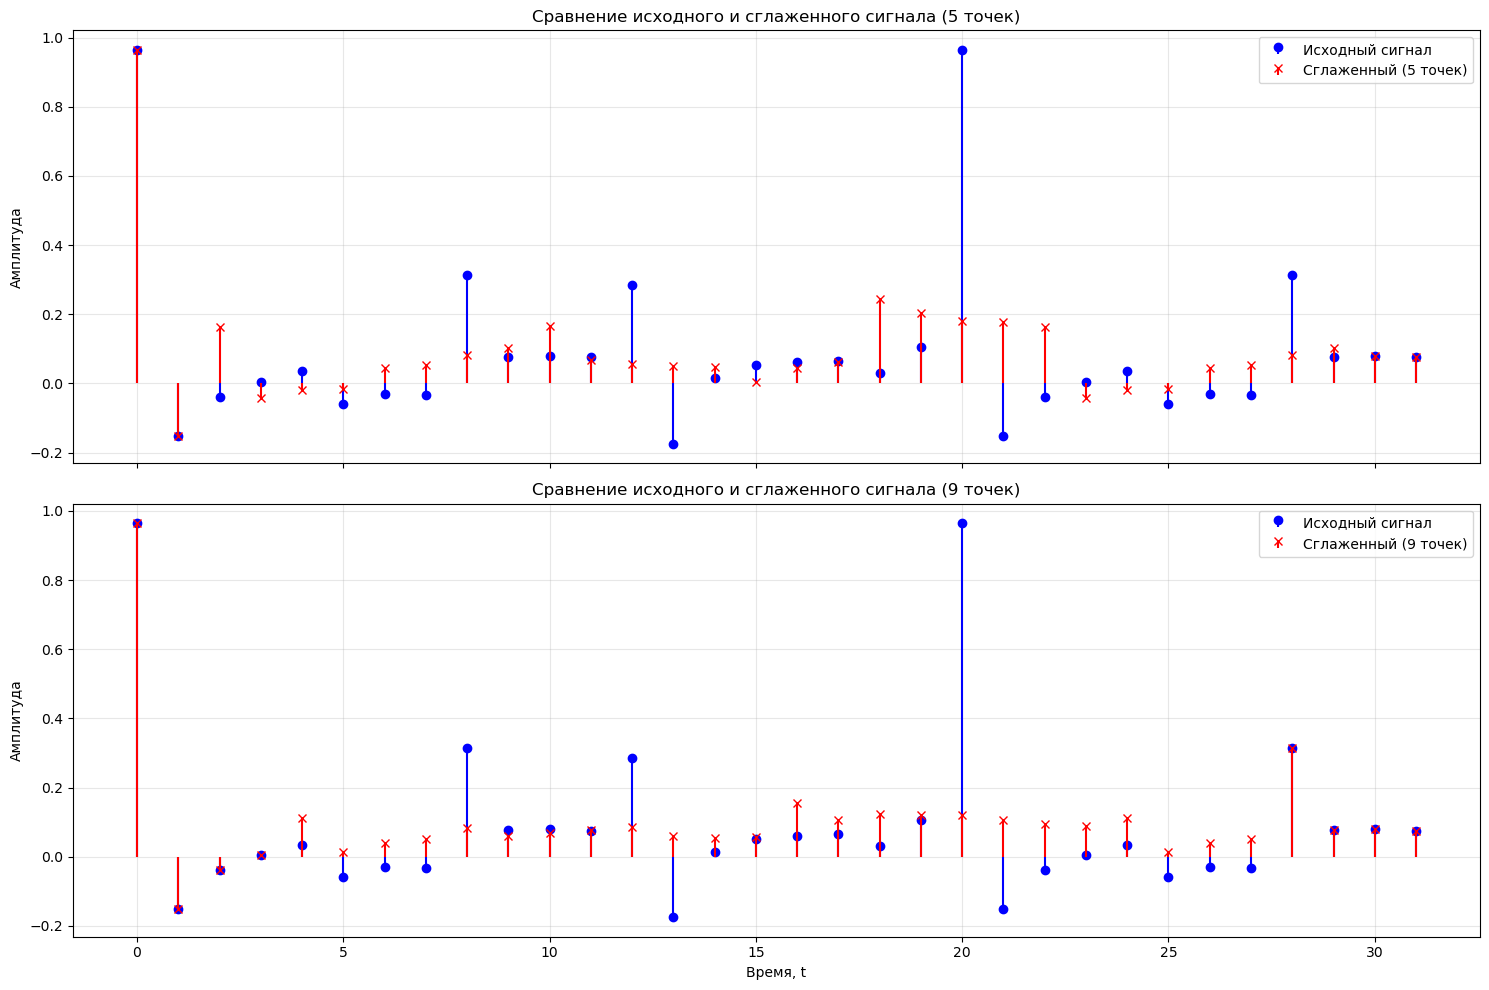

In [282]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# --- График 1: окно 5 ---
axes[0].stem(t_discrete, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
             label='Исходный сигнал')
axes[0].stem(t_discrete, smoothed_5, linefmt='r-', markerfmt='rx', basefmt=' ',
             label='Сглаженный (5 точек)')
axes[0].set_title('Сравнение исходного и сглаженного сигнала (5 точек)')
axes[0].set_ylabel('Амплитуда')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

# --- График 2: окно 9 ---
axes[1].stem(t_discrete, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
             label='Исходный сигнал')
axes[1].stem(t_discrete, smoothed_9, linefmt='r-', markerfmt='rx', basefmt=' ',
             label='Сглаженный (9 точек)')
axes[1].set_title('Сравнение исходного и сглаженного сигнала (9 точек)')
axes[1].set_xlabel('Время, t')
axes[1].set_ylabel('Амплитуда')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()


## Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

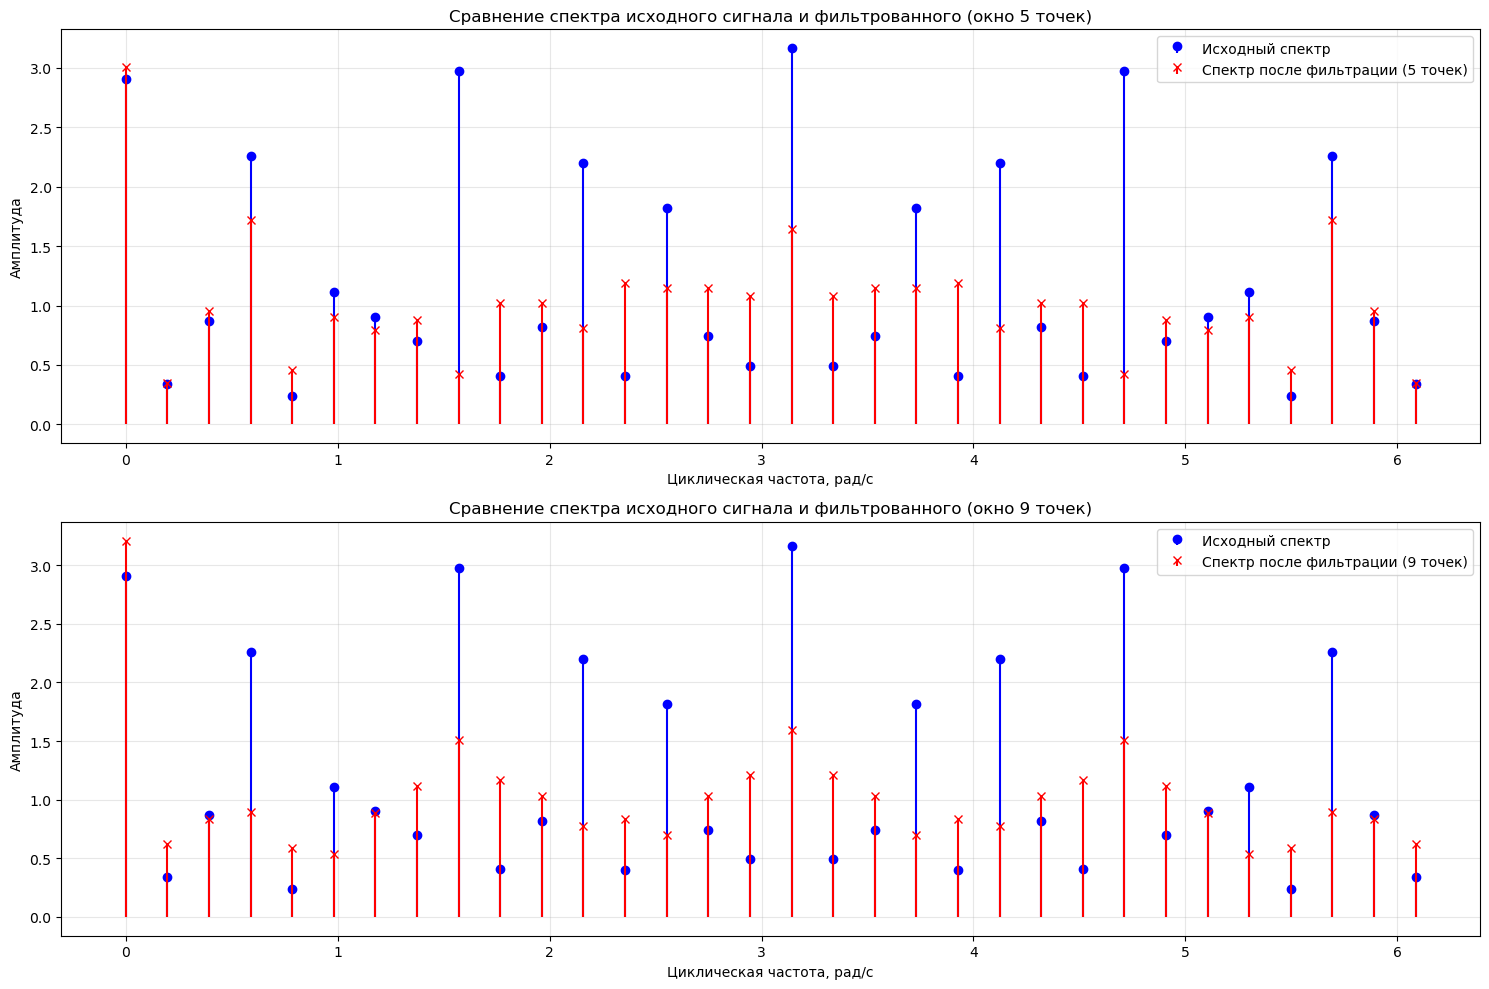

In [285]:
spectr_smoothed_5 = dft(smoothed_5)
spectr_smoothed_9 = dft(smoothed_9)

freq_axis_full = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)

plt.figure(figsize=(15, 10))

# График 1: Сравнение спектров до и после фильтрации (окно 5 точек)
plt.subplot(2, 1, 1)
plt.stem(freq_axis_full, np.abs(spectr), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectr_smoothed_5), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после фильтрации (5 точек)')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектра исходного сигнала и фильтрованного (окно 5 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Сравнение спектров до и после фильтрации (окно 9 точек)
plt.subplot(2, 1, 2)
plt.stem(freq_axis_full, np.abs(spectr), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectr_smoothed_9), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после фильтрации (9 точек)')
plt.xlabel('Циклическая частота, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектра исходного сигнала и фильтрованного (окно 9 точек)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.


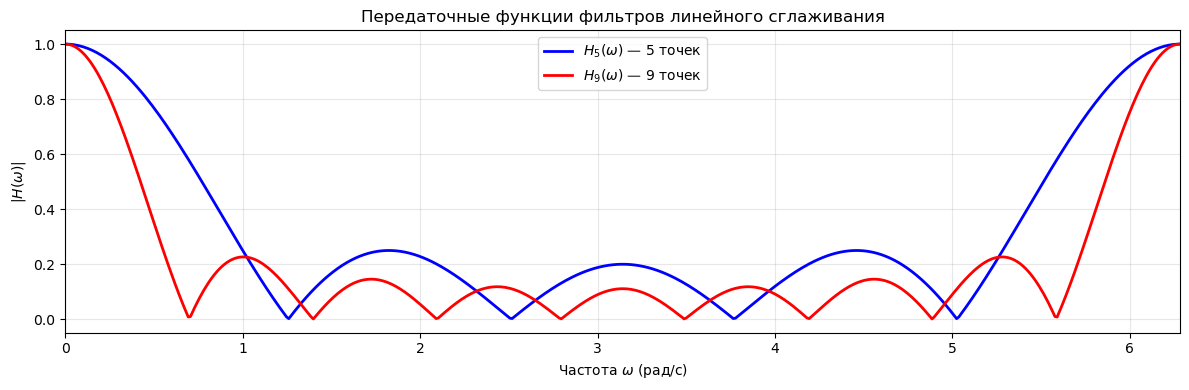

In [288]:
# Аналитическая передаточная функция фильтра скользящего среднего
def H_analytical(w, h):
    numerator = np.sin(w * (h + 0.5))
    denominator = np.sin(w / 2)
    H = np.zeros_like(w, dtype=float)

    # Для элементов, где denominator != 0
    mask = denominator != 0
    H[mask] = (1 / (2 * h + 1)) * numerator[mask] / denominator[mask]

    # Для w = 0 (и кратные 2π) берем предел = 1
    H[~mask] = 1.0

    return H

w_range = np.linspace(0, 2 * np.pi, 500)

plt.figure(figsize=(12, 4))

colors = {2: 'b', 4: 'r'}

for h in [2, 4]:
    window_size = 2 * h + 1
    H_vals = H_analytical(w_range, h)

    plt.plot(w_range, np.abs(H_vals),
             color=colors[h],
             linewidth=2,
             label=f'$H_{{{window_size}}}(\\omega)$ — {window_size} точек')

plt.title('Передаточные функции фильтров линейного сглаживания')
plt.ylabel('$|H(\\omega)|$')
plt.xlabel('Частота $\\omega$ (рад/с)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2 * np.pi)
plt.tight_layout()
plt.show()


### Анализ результатов линейного сглаживания

Линейные фильтры скользящего среднего действуют как фильтры нижних частот, что подтверждается теоретическими передаточными функциями $H(\omega)$ и экспериментальными спектрами.

- **5-точечный фильтр** сглаживает сигнал умеренно, сохраняя основные детали.  
- **9-точечный фильтр** сильнее подавляет высокие частоты, обеспечивая более плавный сигнал, но часть мелких деталей теряется.

На спектрах видно, что у 9-точечного фильтра амплитуды высоких гармоник падают сильнее, чем у 5-точечного, что соответствует теории: чем больше окно фильтра, тем уже полоса пропускания и сильнее подавление высоких частот.

Вывод: увеличение числа точек окна усиливает сглаживание, но уменьшает детализацию сигнала; выбор размера фильтра зависит от требуемого баланса между сглаживанием и сохранением деталей.


## Задание 8
Повторить п. 4–7 для следующих фильтров:
- Дискретный фильтр, соответствующий численному дифференцированию 1-го порядка.
- Дискретный фильтр, соответствующий численному интегрированию (прямоугольников, трапеций, Симпсона).

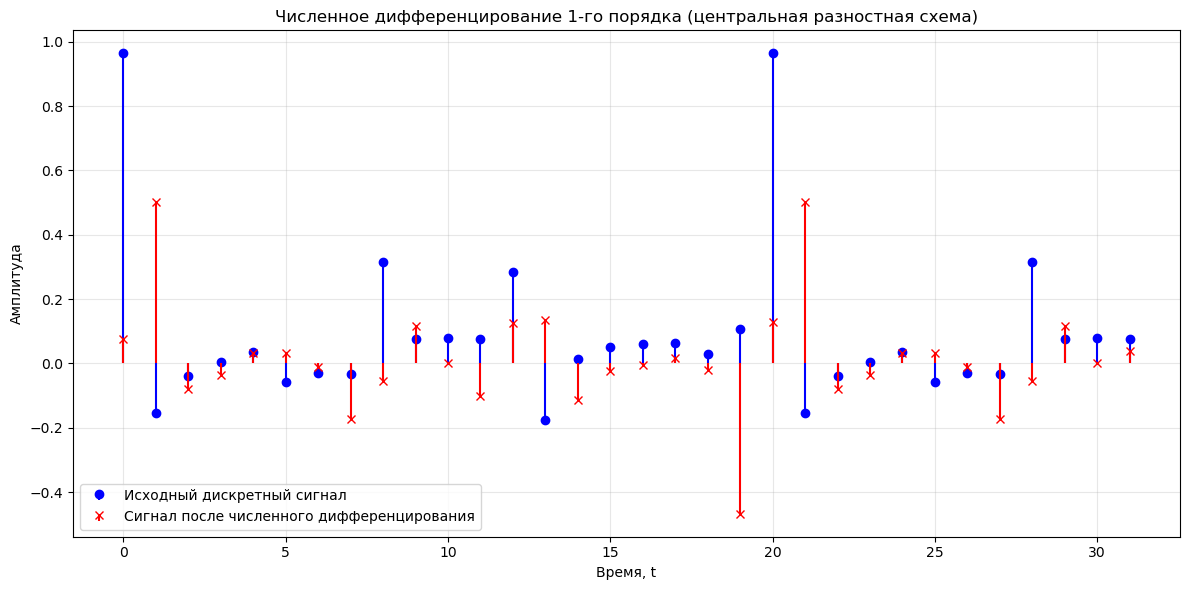

In [292]:
def diff_filter_1st_order(signal):
    kernel = np.array([-0.5, 0.0, 0.5])
    return np.convolve(signal, kernel, mode='same')

diff_signal = diff_filter_1st_order(signal_discrete)

# Теоретическая передаточная функция H(ω) для дифференцирования
def H_diff_theoretical(omega):
    return 1j * np.sin(omega)

plt.figure(figsize=(12, 6))

plt.stem(t_discrete, signal_discrete, linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный дискретный сигнал')
plt.stem(t_discrete, diff_signal, linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Сигнал после численного дифференцирования')

plt.xlabel('Время, t')
plt.ylabel('Амплитуда')
plt.title('Численное дифференцирование 1-го порядка (центральная разностная схема)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


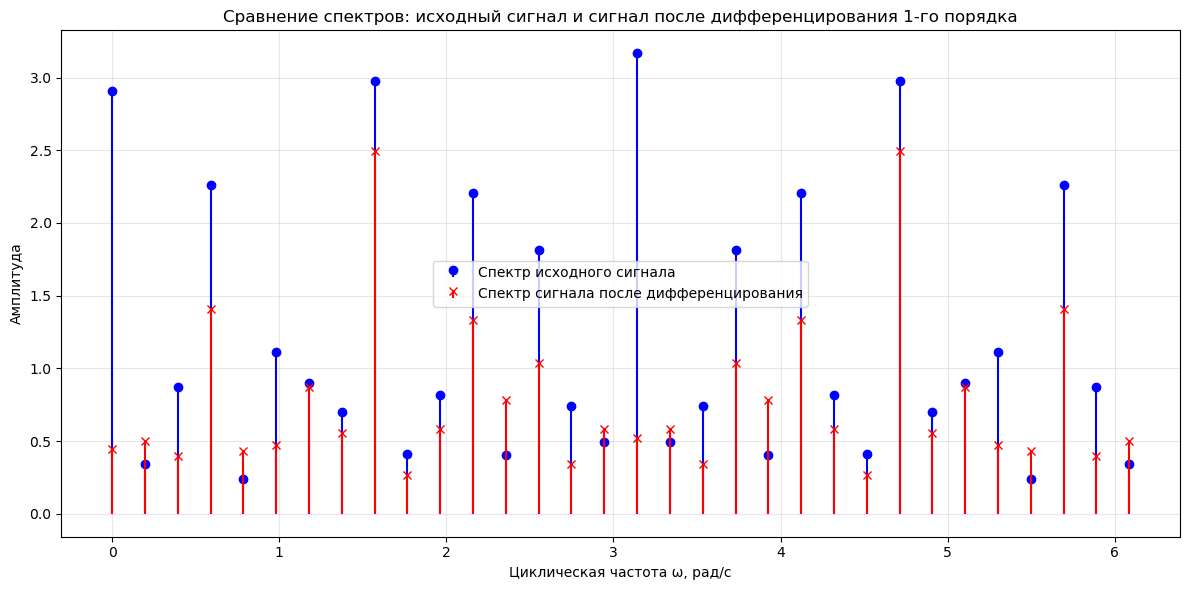

In [294]:
spectr_diff = dft(diff_signal)

# Визуализация спектров в диапазоне 0–2π
plt.figure(figsize=(12, 6))

plt.stem(freq_axis_full, np.abs(spectr), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Спектр исходного сигнала')
plt.stem(freq_axis_full, np.abs(spectr_diff), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр сигнала после дифференцирования')

plt.xlabel('Циклическая частота ω, рад/с')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный сигнал и сигнал после дифференцирования 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


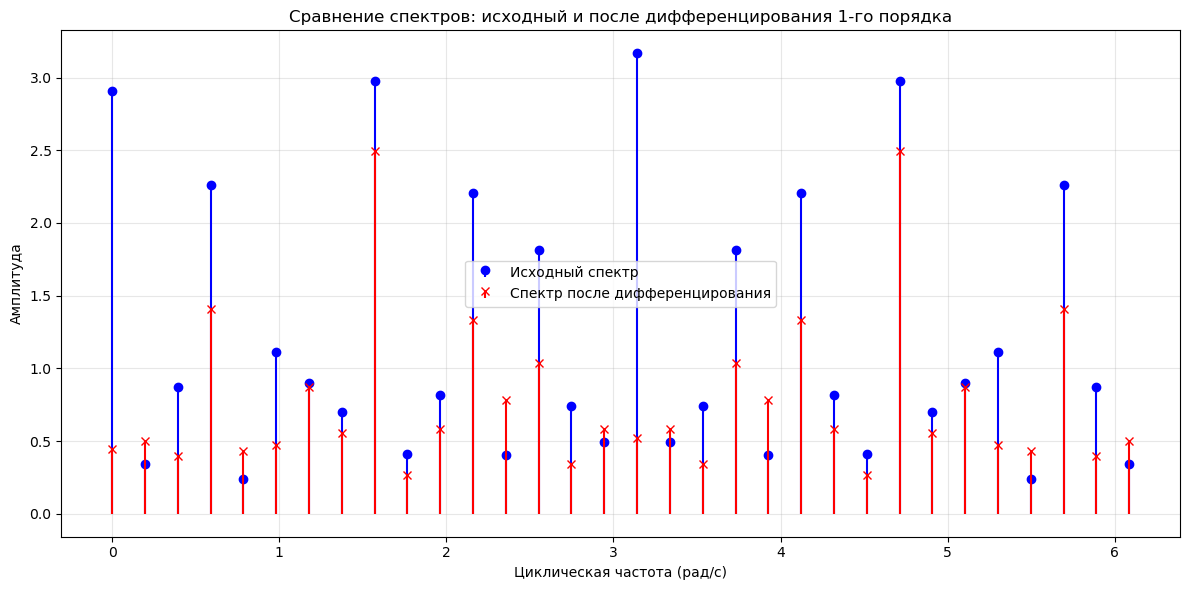

In [296]:
# Спектральный анализ после дифференцирования

# Вычисляем ДПФ для производной
spectrum_diff = dft(diff_signal)

# Визуализация спектров в диапазоне 0-2π
plt.figure(figsize=(12, 6))

plt.stem(freq_axis_full, np.abs(spectr), linefmt='b-', markerfmt='bo', basefmt=' ',
         label='Исходный спектр')
plt.stem(freq_axis_full, np.abs(spectrum_diff), linefmt='r-', markerfmt='rx', basefmt=' ',
         label='Спектр после дифференцирования')

plt.xlabel('Циклическая частота (рад/с)')
plt.ylabel('Амплитуда')
plt.title('Сравнение спектров: исходный и после дифференцирования 1-го порядка')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

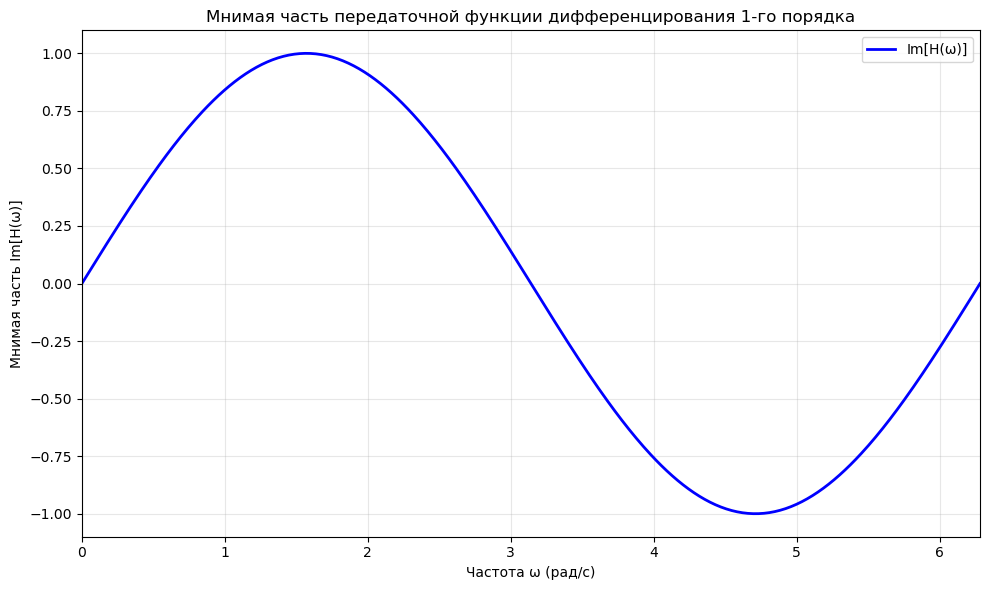

In [298]:
# Теоретическая передаточная функция для численного дифференцирования 1-го порядка

omega_range = np.linspace(0, 2 * np.pi, 500)
H_diff_imag = np.sin(omega_range)  # мнимая часть H(ω) = i*sin(ω)

plt.figure(figsize=(10, 6))
plt.plot(omega_range, H_diff_imag, 'b-', linewidth=2, label='Im[H(ω)]')

plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Мнимая часть Im[H(ω)]')
plt.title('Мнимая часть передаточной функции дифференцирования 1-го порядка')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2 * np.pi)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()


### Анализ работы дискретного фильтра численного дифференцирования 1-го порядка

Сравнение спектров исходного сигнала и сигнала после дифференцирования показывает усиление высокочастотных компонент и ослабление низкочастотных. Это соответствует теоретической передаточной функции дискретного дифференциатора первого порядка $H(\omega) = i \sin(\omega)$, которая приближает идеальный дифференциатор $H(\omega) = i\omega$ на низких частотах ($\omega \to 0$).

На низких частотах фильтр ведёт себя почти как идеальный дифференциатор. На высоких частотах, особенно близких к частоте Найквиста ($\omega \to \pi$), аппроксимация $\sin(\omega) \approx \omega$ нарушается, что приводит к искажению производной для быстро меняющихся компонентов сигнала.

Таким образом, дискретный фильтр корректно реализует численное дифференцирование в низкочастотной части спектра, но точность уменьшается на высоких частотах из-за дискретности и особенностей аппроксимации, что подтверждается визуальным соответствием спектров и теоретической $H(\omega)$.


## Дискретные фильтры, соответствующие численному интегрированию

### Метод прямоугольников
**Разностное уравнение:**
$$
y_{n+1} = y_n + s_{n+0.5}
$$

**Передаточная функция:**
$$
H(\omega) = \frac{1}{2i \, \sin(\omega/2)}
$$

---

### Метод трапеций
**Разностное уравнение:**
$$
y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1})
$$

**Передаточная функция:**
$$
H(\omega) = \frac{\cos(\omega/2)}{2i \, \sin(\omega/2)}
$$

---

### Метод Симпсона
**Разностное уравнение:**
$$
y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4 s_n + s_{n+1})
$$

**Передаточная функция:**
$$
H(\omega) = \frac{2 + \cos(\omega)}{3i \, \sin(\omega)}
$$


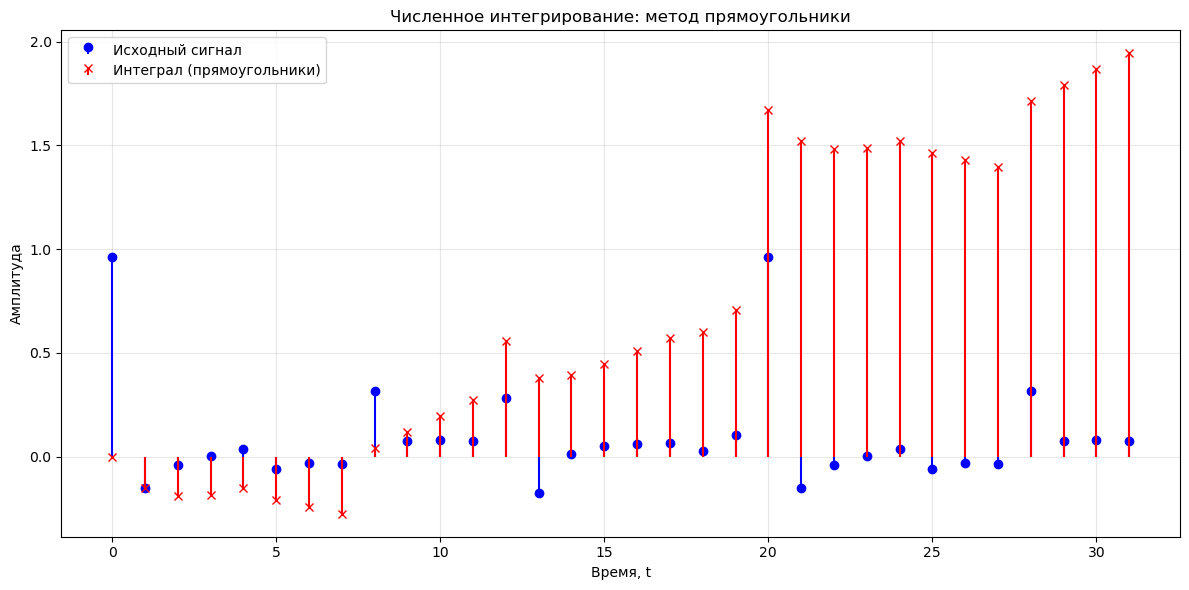

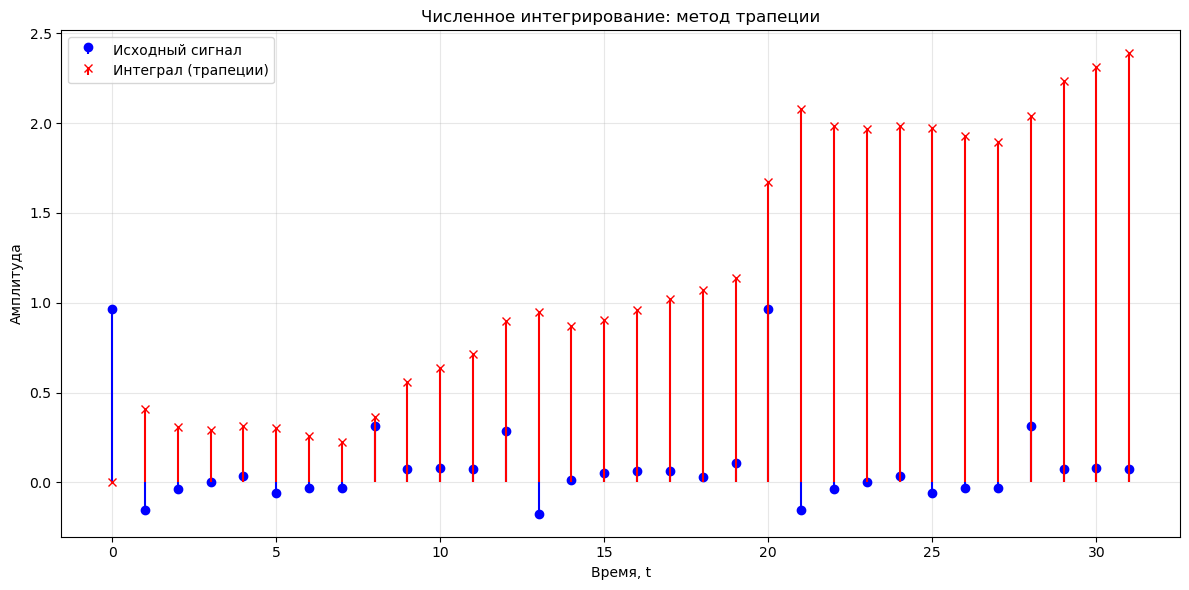

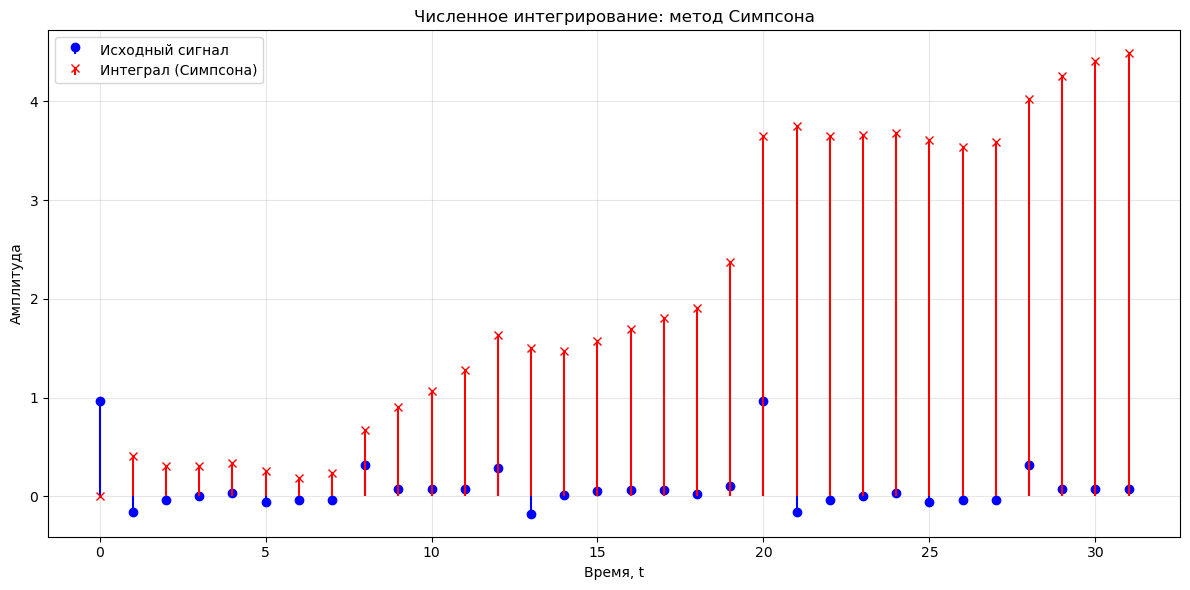

In [302]:
# ---------------------------
# Реализация фильтров численного интегрирования
# ---------------------------

# Аналоговый сигнал для визуализации (метод прямоугольников)
t_analog = np.linspace(0, N * T, 1000)
analog_signal = np.sum([A_k_normalized[k] * np.cos(frequencies[k] * t_analog + phi_k[k])
                        for k in range(num_harmonics)], axis=0)

# --- Метод прямоугольников ---
def integrate_rectangle(signal):
    integrated = np.zeros_like(signal, dtype=float)
    for i in range(1, len(signal)):
        integrated[i] = integrated[i-1] + signal[i]
    return integrated

# --- Метод трапеций ---
def integrate_trapezoid(signal):
    integrated = np.zeros_like(signal, dtype=float)
    for i in range(1, len(signal)):
        integrated[i] = integrated[i-1] + (signal[i-1] + signal[i]) / 2
    return integrated

# --- Метод Симпсона ---
def integrate_simpson(signal):
    N = len(signal)
    integrated = np.zeros(N, dtype=float)
    if N > 1:
        integrated[1] = (signal[0] + signal[1]) / 2
    for i in range(2, N):
        if i < N - 1:
            integrated[i] = integrated[i-1] + (signal[i-1] + 4*signal[i] + signal[i+1]) / 3
        else:  # крайний элемент
            integrated[i] = integrated[i-1] + (signal[i-1] + signal[i]) / 2
    return integrated

# Применяем фильтры
integral_rect = integrate_rectangle(signal_discrete)
integral_trap = integrate_trapezoid(signal_discrete)
integral_simp = integrate_simpson(signal_discrete)

# ---------------------------
# Визуализация результатов
# ---------------------------

def plot_integral(t_discrete, signal, integral, method_name, color):
    plt.figure(figsize=(12, 6))
    plt.stem(t_discrete, signal, linefmt='b-', markerfmt='bo', basefmt=' ', label='Исходный сигнал')
    plt.stem(t_discrete, integral, linefmt=color+'-', markerfmt=color+'x', basefmt=' ',
             label=f'Интеграл ({method_name})')
    plt.xlabel('Время, t')
    plt.ylabel('Амплитуда')
    plt.title(f'Численное интегрирование: метод {method_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 1. Прямоугольники
plot_integral(t_discrete, signal_discrete, integral_rect, 'прямоугольники', 'r')

# 2. Трапеции
plot_integral(t_discrete, signal_discrete, integral_trap, 'трапеции', 'r')

# 3. Симпсон
plot_integral(t_discrete, signal_discrete, integral_simp, 'Симпсона', 'r')


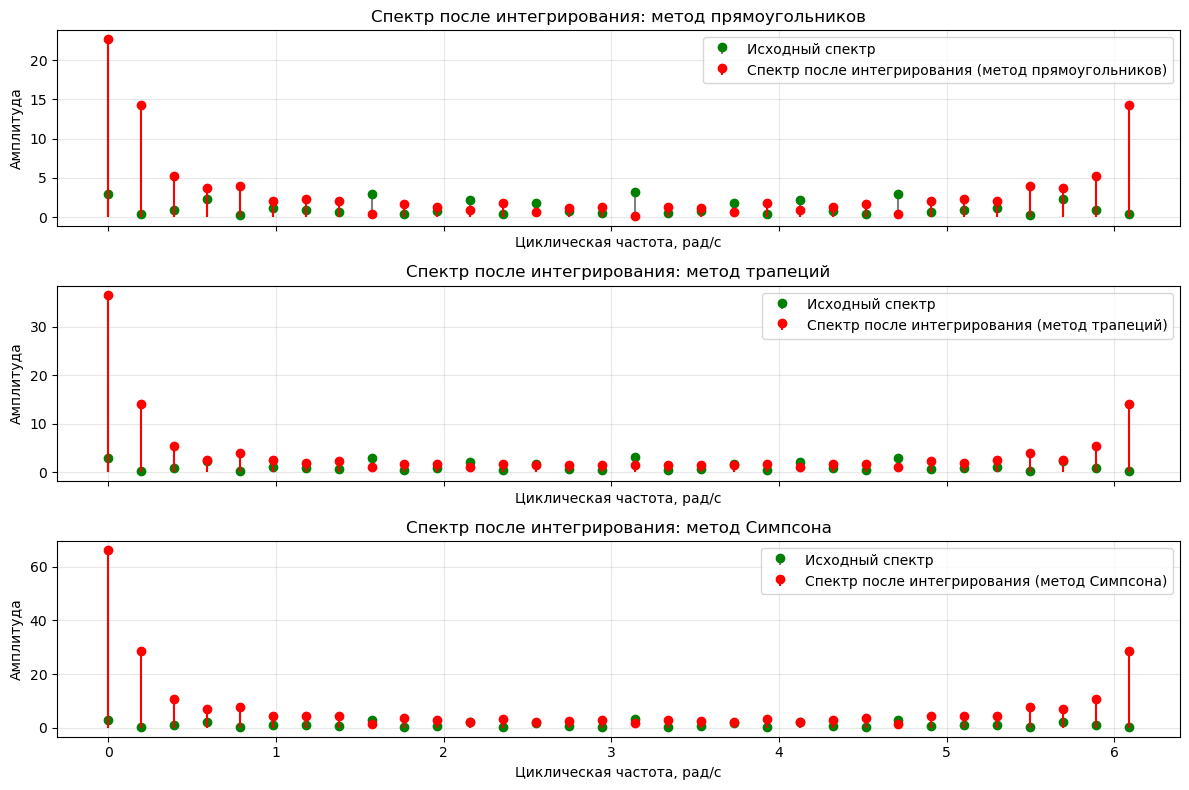

In [304]:
# ---------------------------
# Спектральный анализ после численного интегрирования
# ---------------------------

#ДПФ для интегралов
spectr_rect = dft(integral_rect)
spectr_trap = dft(integral_trap)
spectr_simp = dft(integral_simp)

#Частотная ось
freq_axis = 2 * np.pi * np.arange(len(signal_discrete)) / len(signal_discrete)

def plot_spectrum(ax, freq, original_spectrum, filtered_spectrum, method_name, color):
    ax.stem(freq, np.abs(original_spectrum), linefmt='gray', markerfmt='go', basefmt=' ',
            label='Исходный спектр')
    ax.stem(freq, np.abs(filtered_spectrum), linefmt=color+'-', markerfmt=color+'o', basefmt=' ',
            label=f'Спектр после интегрирования ({method_name})')
    ax.set_xlabel('Циклическая частота, рад/с')
    ax.set_ylabel('Амплитуда')
    ax.set_title(f'Спектр после интегрирования: {method_name}')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Построение трех спектров
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

plot_spectrum(axes[0], freq_axis, spectr, spectr_rect, 'метод прямоугольников', 'r')
plot_spectrum(axes[1], freq_axis, spectr, spectr_trap, 'метод трапеций', 'r')
plot_spectrum(axes[2], freq_axis, spectr, spectr_simp, 'метод Симпсона', 'r')

plt.tight_layout()
plt.show()


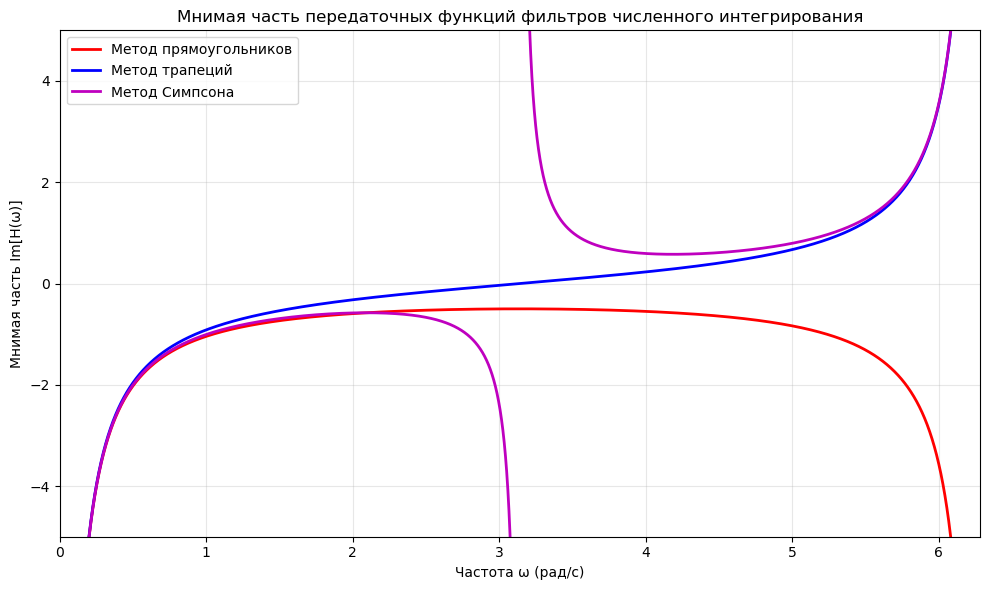

In [306]:
# ---------------------------
# Мнимые части передаточных функций фильтров интегрирования
# ---------------------------

# Определение передаточных функций
def H_rect(omega):
    """Передаточная функция метода прямоугольников"""
    return 1 / (2j * np.sin(omega / 2))

def H_trap(omega):
    """Передаточная функция метода трапеций"""
    return np.cos(omega / 2) / (2j * np.sin(omega / 2))

def H_simp(omega):
    """Передаточная функция метода Симпсона"""
    return (2 + np.cos(omega)) / (3j * np.sin(omega))

# Диапазон частот (избегаем ω=0 для деления на ноль)
omega_range = np.linspace(0.001, 2 * np.pi, 10000)

# Вычисление мнимых частей
H_rec_vals = np.imag(H_rect(omega_range))
H_trap_vals = np.imag(H_trap(omega_range))
H_simp_vals = np.imag(H_simp(omega_range))

# Коррекция значений около разрыва (Симпсон при ω≈π)
H_simp_vals[np.abs(omega_range - np.pi) < 0.001] = np.nan

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(omega_range, H_rec_vals, 'r-', linewidth=2, label='Метод прямоугольников')
plt.plot(omega_range, H_trap_vals, 'b-', linewidth=2, label='Метод трапеций')
plt.plot(omega_range, H_simp_vals, 'm-', linewidth=2, label='Метод Симпсона')

plt.xlabel('Частота ω (рад/с)')
plt.ylabel('Мнимая часть Im[H(ω)]')
plt.title('Мнимая часть передаточных функций фильтров численного интегрирования')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, 2 * np.pi)
plt.ylim(-5, 5)

plt.tight_layout()
plt.show()


Сравнение спектров интегрированных сигналов с исходным показывает усиление низкочастотных компонентов и подавление высоких частот.  

Методы прямоугольников и трапеций на низких частотах ($\omega \to 0$) близки к идеальному интегратору, но на высоких частотах проявляют различия: метод трапеций полностью подавляет частоту Найквиста ($H(\pi) = 0$), а метод прямоугольников сохраняет конечное усиление.  

Метод Симпсона обеспечивает наиболее точное приближение идеального интегратора в средней полосе частот, хотя на высоких частотах также отклоняется от идеальной характеристики, сохраняя ненулевое значение $H(\pi)$.  

Все три фильтра корректно интегрируют низкочастотные компоненты, действуя как фильтры нижних частот. Наиболее точным является метод Симпсона, однако точность всех методов ограничена на высоких частотах из-за дискретности и аппроксимации производной, что подтверждается согласованием экспериментальных спектров с теоретическими передаточными функциями.


## Выводы

В ходе лабораторной работы были исследованы методы анализа и обработки дискретных сигналов. Синтезирован и дискретизирован сигнал, проанализирован его спектр с помощью ДПФ.  

Изучены различные фильтры: линейное сглаживание (скользящее среднее), дифференцирующий и интегрирующие. Экспериментально подтверждено, что их действие во временной области (сглаживание, выделение производной или интеграла) полностью согласуется с теоретическими частотными характеристиками:  
- фильтры нижних частот подавляют высокие частоты,  
- дифференцирующий фильтр усиливает высокие частоты,  
- интегрирующие фильтры подавляют высокие частоты, демонстрируя свойства ФНЧ.  

Работа наглядно показала связь между сверткой во временной области и умножением в частотной, подтверждая теоретические представления о дискретной обработке сигналов.
